In [ ]:
# CNN basics / MNIST

(3, 3, 1)


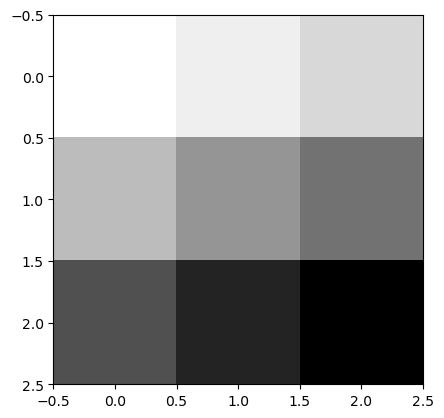

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

image = np.array([[[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]], dtype=np.float32)
print(image.shape)
plt.imshow(image, cmap="Greys")

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


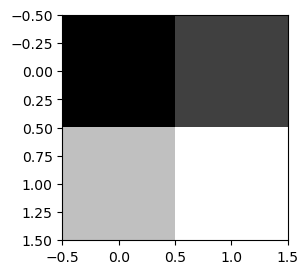

In [18]:
image = image.reshape([1, 3, 3, 1])
print("image.shape", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="VALID")
conv2d_img = conv2d
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2, 2), cmap="gray")

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


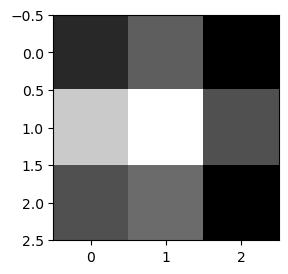

In [20]:
image = image.reshape([1, 3, 3, 1])
print("image.shape", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="SAME")
conv2d_img = conv2d
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap="gray")

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


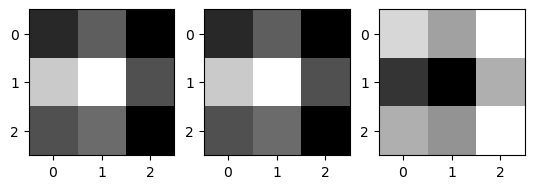

In [21]:
image = image.reshape([1, 3, 3, 1])
print("image.shape", image.shape)
weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]],
                      [[[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="SAME")
conv2d_img = conv2d
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i+1)
    plt.imshow(one_img.reshape(3, 3), cmap="gray")

In [22]:
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="SAME")
print(pool.shape)
print(pool)

(1, 2, 2, 1)
tf.Tensor(
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]], shape=(1, 2, 2, 1), dtype=float32)


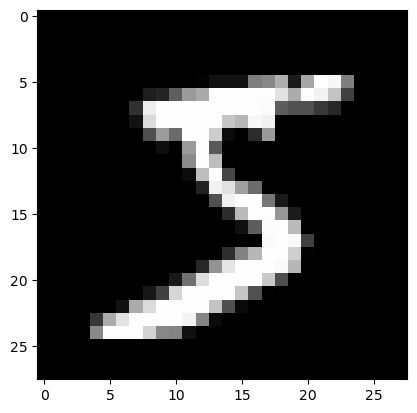

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
nb_classes = 10
x_train = tf.reshape(x_train, [len(x_train), -1])
x_test = tf.reshape(x_test, [len(x_test), -1])
y_train = tf.one_hot(y_train, depth=nb_classes)
y_test = tf.one_hot(y_test, depth=nb_classes)

img = tf.reshape(x_train[0], [28, 28])
plt.imshow(img, cmap="gray")

(1, 14, 14, 5)


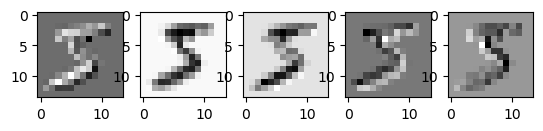

In [46]:
img = tf.reshape(img, [-1, 28, 28, 1])
img = tf.cast(img, tf.float32)
initializer = tf.keras.initializers.GlorotUniform()
W1 = tf.Variable(initializer([3, 3, 1, 5]))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding="SAME")
print(conv2d.shape)
conv2d_img = conv2d
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(14, 14), cmap="gray")


(1, 7, 7, 5)


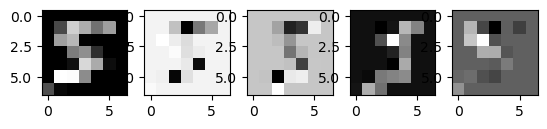

In [49]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(pool.shape)
pool_img = pool
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1)
    plt.imshow(one_img.reshape(7, 7), cmap="gray")